# Example of application of the sdlabb package for metadata extaction
# TF-IDF method 
Created 13-11-20

Author: Fredrik Möller 



# Walkthrough
This walkthrough will only deal with the `NCOF`method available in the package, an example of the `TF-IDF` based method is available in the demos folder. This walkthrough is available as a notebook in the demos folder.
### Install the alpacka package through pip, or download the package through github.

`pip install alpacka`

[Link to github repo](https://github.com/BernhardMoller/alpacka)

### Set up

To be able to use the alpacka package a data set for the analysis is needed. For this demo we will use the "Twitter US Airline Sentiment" data set. Availabe at https://www.kaggle.com/crowdflower/twitter-airline-sentiment


In [1]:
import pandas as pd
data = pd.read_csv('Tweets.csv')


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


From the code we can see that the data has been loaded but the "airline_sentiment" are not integer labels, we need to fix this.

**IMPORTANT:** The alpacka package can only handle integer labels in the range of [0 n]. If your data set has labels in any other range you will need to translate them to the [0 n] range.

In [2]:
print(data.airline_sentiment[:10])
score = pd.factorize(data.airline_sentiment)
print(score[:10])
score= score[0]
print(score[:10])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


We can now see that the data is transformed from stings to integers in the range of [0 2]. With the mapping neutral: 0 , positive: 1, negative: 2.

### Importing and initiating alpacka
Now we are ready to import and initiate alpacka. 

In [4]:
from alpacka.Pipeline import Pipeline

p = Pipeline(num_words=10000, class_perspective = 2)

TypeError: __init__() got an unexpected keyword argument 'num_words'

There are some setting that we can make in the NCOF method that we need to specify before we start. One of which is how many unique tokens do we want to to take into consideration in the analysis, variable `num_words`. The defult setting for this variable is `None` meaning that all unique tokens will be used in the analysis. For "large" data sets this choice is quite ambitious given that the number of tokens that appear only once or twice in the a corpus. For this walkthrough we will limit the analysis to the $10,000$ most common words in the corpus.

Another setting that we need to specify is for what class we want the results presented for, variable `class_perspective`. As the NCOF method presents results regarding if a token is overrepresented in a class compared to the rest of the corpus, which class to investigate nees to be specified, the defult value of `class_perspective` is `1`. For this demo we have chosen the perspective of class 2 (negatives).


Now the `TF-IDF` pipeline is initiated through the wrapper `Pipeline` and the induvidual analysis methods can be accessed be calling:

`p.ncof.some_functions()`

Now we are ready to start the analysis of our data. 

Note that the  `.some_functions()` function is a placeholder and do exist.

#### Calculate TF-IDF
Now we are ready to calculate the NCOF score for the review data and its scores. This is done by calling the `.calc_tfidf(data,labels)` function.  For this example the input in the `data` field is the texts, and the `labels` is the review scores. 

In [5]:
tfidf_score, dictionary = p.tfidf.calc_tfidf(data.text, score)

NameError: name 'p' is not defined

Stop words can also automatically be removed from the NCOF calculating by passing a set of stop words in the `.calc_tfidf` function. The reason you might want to remove stop words before NCOF calculations is due tothe stop words altering frequency distrubution of "value adding" words by by increasing the frequencylimit of when a word is considered as an NCOF outliers. Top top is to test with and without the stop word removal and you will see the difference. 

For this demo we keep the score where stop words has been removed.

In [ ]:
tfidf_score, dictionary = p.ncof.calc_ncof(data.text, score,stop_words=stop_words)

We now have an array, `tfidf_score`, that contains the TF-IDF results for our data. This array will have the size `[2,num_words]` with and positive values. the values from the first row are the TF-iDF score for all investigated tokens from the classes that we have deemed as "not important" i.e. allclasses that are not the `class_perspective`. The second rown contains all TF-IDF score for the class that we have put as the `class_prespective`.


In [7]:
print(ncof_score[0][:10])

In addition to an array with the scores the `.calc_tfidf()` function returns a dictionary that maps the indexes in the  `tfidf_score ` array to its text representations, and can be accessed by calling:

In [8]:
w = list(dictionary.items())[:10]
for item in w:
    print(item)

 TF-IDF score added under 'self.score'  use self.get_--- to access the result


#### Sorting results
To sort the array into inliers and outliers for the positive and negative values the function `.split_score()`needs to be called. The inliers can be accessed through:

**Important:** The outliers associated with the class set as `class_perspective` will be contained in the second element in the outliers list. Such that they can be called from `outliers[1]`. The same for all outliers calculated from the other classes by calling `outliers[0]`.  


In [9]:
inliers, outliers = p.tfidf.split_score(tfidf_score)

[[0.28835468 0.11496277 0.31456163 ... 0.16087201 0.09147622 0.26491669]
 [0.31219396 0.18952645 0.10242599 ... 0.33223068 0.33409239 0.35338639]]


Since the outliers from the two groups can have the same word indexes idenified as outliers the symmteric set difference is taken from both groups such that the only outlier words that remain are those that are identified in only the "positive" group or the "negative" group. This is done by using the function `.unique_outliers_per_class()` 

In [6]:
outliers_pos , outliers_neg = p.tfidf.unique_outliers_per_class(outliers=outliers)

NameError: name 'p' is not defined

This call will return the indexes of the words in the dictionary that are considered as outliers in the TF-IDF results.

The results are sorted within the `outliers_pos `and `outliers_neg ` as the following:

For class $1$

tfidf_pos[0] = $\mu+\sigma\leq result <\mu+2\sigma$

tfidf_pos[1] = $\mu+2\sigma\leq result <\mu+3\sigma$

tfidf_pos[2] = $\mu+3\sigma\leq result$

    
For class $0$

tfidf_neg[0] = $\mu+\sigma\leq result <\mu+2\sigma$
   
tfidf_neg[1] = $\mu+2\sigma\leq result <\mu+3\sigma$

tfidf_neg[2] = $\mu+3\sigma\leq result$

#### Plotting results
These results can be plotted by calling the function `.plot_merged_histogram()` this will give some visual information regarding how the distrubutions of the TF-IDF scores are in the two groups. 

In [ ]:
p.tfidf.plot_merged_histogram(tfidf_score,x_label = 'tf-idf score', y_label= 'counts', legend= ['class 0', 'class 1'])

#### Plotting results
These results can be plotted by calling the function `.scatter()` which will give visual information regarding what tokens are over or under represented in the investigated class. 

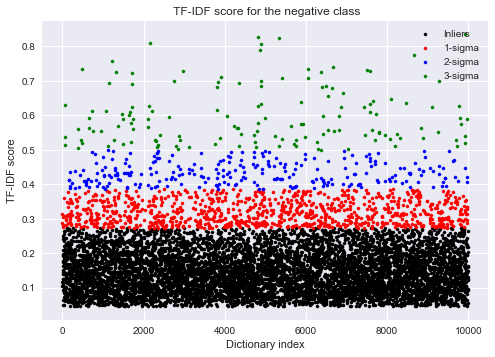

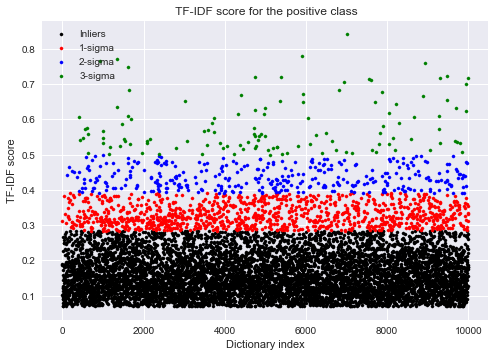

In [14]:
p.tfidf.scatter()

The results can also be plotted as an histogram. Note that the input in this example is the entirery of the TF-IDF score. 

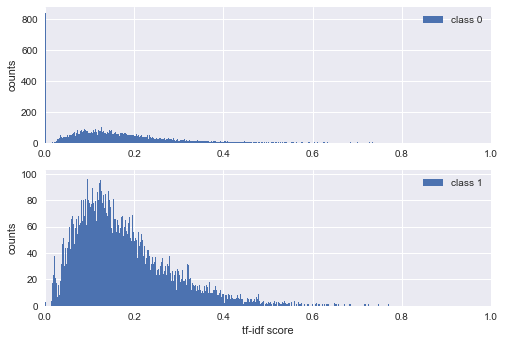

Printing merged histograms


#### Converting results from indexes to text
Since it is quite difficult to interpret the socre for each the indexes directly, it is suggested that the indexes are transformed back to their text representations. This can be done by calling the `.tfidf.ind_2_txt(data)` function, the function input should be either indexes of the positive or negative outlers. 

In [7]:
words_pos = p.tfidf.ind_2_txt(tfidf_pos)

words_neg = p.tfidf.ind_2_txt(tfidf_neg)


NameError: name 'p' is not defined

If the text results want to be cleaned from stop words for clarification. The function `.remove_stop_words(data,stop_words)` can be called. This functon compares the content of the input `data` to that of the input `stop-words` and removes any matches between them from the `data`. For this walkthrough we will use the stop words available from the NLTK package.

We have already removed the stop words from the data set when we calculated the NCOF score, so we will not need to preform this step. That is why this part is commented out. 

In [21]:
# words_pos = p.tfidf.remove_stop_words(words_pos,stop_words)
    
# words_neg = p.tfidf.remove_stop_words(words_neg,stop_words)

#### Print results to terminal. 
We have now gone through all the steps required to produce, plot, and clean the reults from the NCOF analysis method. The last part is to either save the results to a file or to print them to the terminal. Since format to save the results to is a user preference no function for this is provided in the alpacka package, however the results can be printed to the terminal by calling the following function.

The input variable `sort` can be set to either `True` or `False` and decides if the results should be printed as alphabetically sorted or not. 
   

In [22]:
print(f"printing outliers from the investigated class")
p.tfidf.get_result(tfidf_score,words_pos, sort = True)
print(f" ")
print(f"printing outliers from the remaining classes")
p.tfidf.get_result(tfidf_score,words_neg, sort = True)

printing outliers from the investigated class
Printing 1-sigma outliers, alphabetically sorted
####################
125
1lbs
24
3x
41
4lb
53
62
73
81
a1
absolute
absolutly
accept
access
accompanied
achieved
acrid
ad
afghanistan
african
alarm
alfredo
aloe
aloha
alone
amazons
ambrosia
annoying
another
anticipation
antler
antlers
anyhow
appear
appetizers
applesauce
appreciates
approved
apso
argentina
arrival
artificially
asap
assortment
attachment
aunt
austin
australia
automatic
awaiting
award
babies
bad
bands
bang
barry
baskets
bbq
begging
beneful
bengal
berry
betty
bichon
bike
biking
binge
bionaturae
biscuit
bitter
blair
blending
blessed
blood
blooming
blues
boil
bone
bonito
bonus
booster
bothersome
bouillon
bowls
bowser
boys
brainer
branches
brazil
brazilian
breakfast
breakfasts
breaks
breathe
breathing
breville
bridal
brighter
brush
buffet
bugs
bulky
bunnies
busted
butterscotch
buttons
buzz
caf
calif
calming
calms
cancelling
candies
canines
captured
carb
carbquik
cardamom
cared
carrag

appalled
apparently
applied
approves
apricots
arm
array
artisana
ashamed
aspartame
atlanta
atlantic
attacks
attract
australian
authority
avoderm
avoid
avoids
awful
awkward
bags
bakery
balm
bamboo
banged
barbecue
barbeque
bare
barilla
bark
barn
baronet
bay
bb
bc
beaks
bear
beforehand
believing
birds
bison
bisquick
bittersweet
bitty
bladder
bleeding
blends
bonsai
boo
book
boot
boss
bothers
boxes
brand
bravo
breads
breastfeeding
brewer
brews
brick
british
broke
browned
brulee
brushing
budget
bumble
bummed
bun
buns
burger
burns
burnt
business
bust
button
cafe
caffiene
calcium
camp
candle
cap
cappuccinos
card
carnivores
cars
causing
century
certification
certified
chance
cheaper
cheeses
cheetos
chef
chewer
chewiness
chick
chihuahua
chipped
chives
choco
chocolately
choke
chops
chow
chunky
claims
cliff
clippings
closet
cloudy
cloves
clumps
co2
cocoas
cod
coffe
colder
collar
colony
columbia
commonly
compares
con
conclude
consequently
consistently
cosmic
couch
country
county
courteous
covering


kimchi
kiwi
kombucha
kona
lowrey
malt
maltitol
marzipan
matcha
miracle
monte
ms
mud
nespresso
netrition
nitrite
notification
ocha
packs
papaya
pb
peaberry
pearled
peet
pennsylvania
pez
pineapple
pistachios
polyunsaturated
porcini
potatos
princess
priority
proflowers
prune
raisins
rican
rise
rooibos
saeco
salada
salami
sardine
sause
scouts
se
senna
senseo
shrimp
slides
smarties
spagetti
spinach
stevia
tartar
teenie
tomatoes
truffles
weed
wegman
whip
wilton
wipes
yakisoba
yama
yeast
zest
####################
